In [1]:
import pandas as pd
# Load dataset

data = pd.read_csv('../Dataset/data_clean.csv')
data = data.dropna()

import advertools as adv
# stopwords

my_stopwords = list(adv.stopwords['tagalog'])
my_stopwords.extend(list(adv.stopwords['english']))
my_stopwords.extend(['yung','lang','naman','po','seller','order','sana','ung','sya'])


In [2]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  4085
Number of columns:  2


In [3]:

# Count the number of positive and negative reviews
sentiment_counts = data['sentiment'].value_counts()

# Print the results
print(sentiment_counts)

negative    2191
positive    1894
Name: sentiment, dtype: int64


# 3 MACHINE LEARNING

SPLIT DATASET

In [4]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data['review'], data['sentiment'], test_size=0.3, random_state=42)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Create a CountVectorizer object to convert text to numerical features
vectorizer = TfidfVectorizer(stop_words=my_stopwords)

# Transform the text data into numerical features
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)


NAIVE BAYES

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


# Create a MultinomialNB object
nb = MultinomialNB(alpha=0.10)
# Fit the MultinomialNB model on the training data
nb.fit(X_train, y_train)
# Make predictions on the validation data using the MultinomialNB model
y_pred_nb = nb.predict(X_val)
# Calculate the accuracy, precision, recall, and F1 score of the MultinomialNB model on the validation data
report = classification_report(y_val, y_pred_nb)
print(f'Naive Bayes Classification Report: \n{report}')

nb_accuracy = accuracy_score(y_val, y_pred_nb)
print(f'Accuracy: {nb_accuracy}')

Naive Bayes Classification Report: 
              precision    recall  f1-score   support

    negative       0.90      0.91      0.90       650
    positive       0.89      0.89      0.89       576

    accuracy                           0.90      1226
   macro avg       0.90      0.90      0.90      1226
weighted avg       0.90      0.90      0.90      1226

Accuracy: 0.8972267536704731


SVM

In [7]:
from sklearn import svm

# Create an SVM object and fit the model to the training data
clf = svm.SVC()
clf.fit(X_train, y_train)

# Use the trained SVM model to make predictions on the validation data
y_pred_svm = clf.predict(X_val)

# Calculate the performance metrics for the SVM model
report_svm = classification_report(y_val, y_pred_svm)
print(f'SVM Classification Report: \n{report_svm}')
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f'Accuracy: {svm_accuracy}')

SVM Classification Report: 
              precision    recall  f1-score   support

    negative       0.87      0.94      0.90       650
    positive       0.93      0.84      0.88       576

    accuracy                           0.89      1226
   macro avg       0.90      0.89      0.89      1226
weighted avg       0.90      0.89      0.89      1226

Accuracy: 0.8947797716150081


Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest object and fit the model to the training data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Use the trained Random Forest model to make predictions on the validation data
y_pred_rf = rfc.predict(X_val)

# Calculate the performance metrics for the Random Forest model
report_rf = classification_report(y_val, y_pred_rf)
print(f'Random Forest Classification Report: \n{report_rf}')
rfc_accuracy = accuracy_score(y_val, y_pred_rf)
print(f'Accuracy: {rfc_accuracy}')

Random Forest Classification Report: 
              precision    recall  f1-score   support

    negative       0.87      0.90      0.89       650
    positive       0.89      0.85      0.87       576

    accuracy                           0.88      1226
   macro avg       0.88      0.88      0.88      1226
weighted avg       0.88      0.88      0.88      1226

Accuracy: 0.8776508972267537


# FINE TUNING

In [9]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tuned
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Choose an appropriate performance metric
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score, average='weighted'), 'recall': make_scorer(recall_score, average='weighted'), 'f1': make_scorer(f1_score, average='weighted')}


# Create a GridSearchCV object to search over the hyperparameters
grid_search = GridSearchCV(nb, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5)

# Fit the GridSearchCV object to the training set
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding scores
print('Best parameters:', grid_search.best_params_)
print('Best scores:', grid_search.best_score_)

# Train the model on the entire training set using the best hyperparameters
nbHyperTuning = MultinomialNB(alpha=1)
nbHyperTuning.fit(X_train, y_train)

y_pred = nbHyperTuning.predict(X_val)

reportHyperTuning = classification_report(y_val, y_pred)
print(f'Naive Bayes Classification Report: \n{reportHyperTuning}')

nbHT_accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {nbHT_accuracy}')



Best parameters: {'alpha': 1.0}
Best scores: 0.8852816185565746
Naive Bayes Classification Report: 
              precision    recall  f1-score   support

    negative       0.90      0.93      0.91       650
    positive       0.92      0.88      0.90       576

    accuracy                           0.91      1226
   macro avg       0.91      0.90      0.90      1226
weighted avg       0.91      0.91      0.91      1226

Accuracy: 0.9053833605220228


Sample Sentence

In [10]:

# Define a sample sentence
sentence = "hindi bibili"

# Transform the sentence into numerical features using the same vectorizer object
X_sentence = vectorizer.transform([sentence])

# Use the trained MultinomialNB model to predict the sentiment of the sentence
sentiment = nbHyperTuning.predict(X_sentence)

print(f"Sentence: {sentence}")
print(f"Predicted sentiment: {sentiment[0]}")

Sentence: hindi bibili
Predicted sentiment: negative


# DATAFRAME

In [11]:
df = pd.DataFrame({
    'Model': ['Naive Bayes HT', 'Naive Bayes', 'SVM', 'Random Forest'],
    'Accuracy': [nbHT_accuracy, nb_accuracy, svm_accuracy, rfc_accuracy]
})

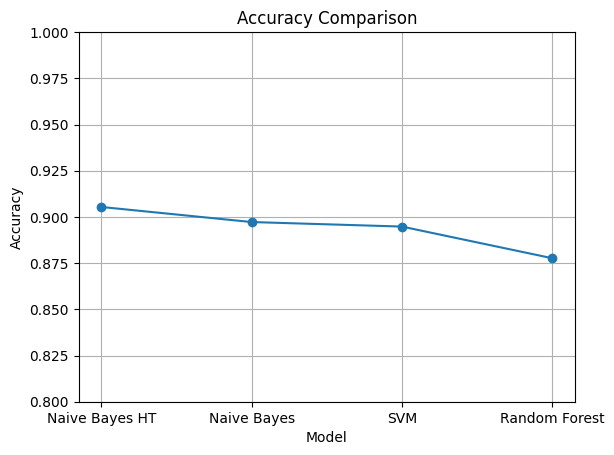

In [12]:
import matplotlib.pyplot as plt

plt.plot(df['Model'], df['Accuracy'], marker='o')
plt.ylim([0.80,1])
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy Comparison')
plt.grid(True)
plt.show()

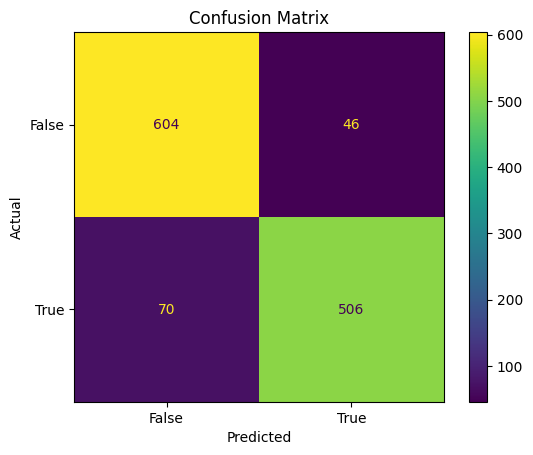

In [13]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

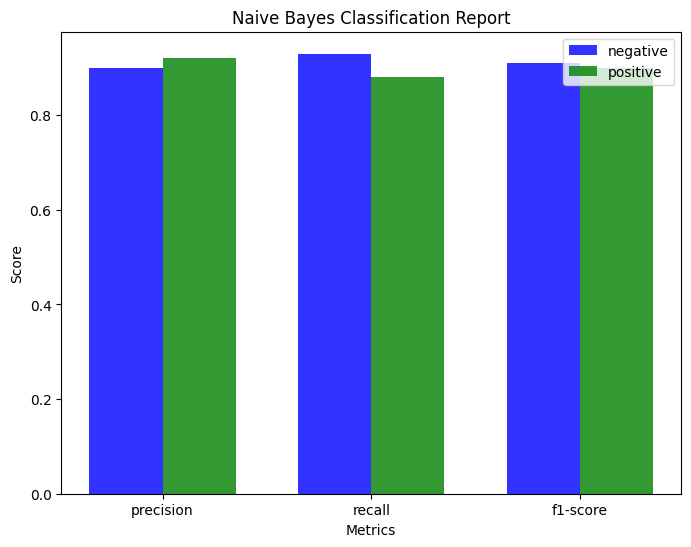

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# create a numpy array of the precision, recall, and f1-score values for negative and positive classes
metrics = np.array([[0.90, 0.93, 0.91], [0.92, 0.88, 0.90]])

# create a bar plot for the metrics
fig, ax = plt.subplots(figsize=(8, 6))
x_labels = ['precision', 'recall', 'f1-score']
x_ticks = np.arange(len(x_labels))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x_ticks - bar_width/2, metrics[0], bar_width, alpha=opacity, color='b', label='negative')
rects2 = ax.bar(x_ticks + bar_width/2, metrics[1], bar_width, alpha=opacity, color='g', label='positive')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Naive Bayes Classification Report')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.legend()

# display the plot
plt.show()

In [15]:
# Count the number of occurrences of each class in the training data
class_counts = data["sentiment"].value_counts()

# Compute the total number of training instances
total_count = class_counts.sum()

# Compute the prior probability of each class
prior_probs = class_counts / total_count

print("Prior probability of positive sentiment:", prior_probs["positive"])
print("Prior probability of negative sentiment:", prior_probs["negative"])

Prior probability of positive sentiment: 0.46364749082007345
Prior probability of negative sentiment: 0.5363525091799266


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

data = pd.read_csv('../Dataset/data_clean.csv')
data = data.dropna()

# Split dataset into positive and negative classes
positive_data = data[data['sentiment'] == 'positive']
negative_data = data[data['sentiment'] == 'negative']


# Create tf-idf vectorizer for positive class
tfidf_pos = TfidfVectorizer()
tfidf_pos.fit(positive_data['review'])

# Create tf-idf vectorizer for negative class
tfidf_neg = TfidfVectorizer()
tfidf_neg.fit(negative_data['review'])

phrase = "maganda fast delivery "
pos_tfidf_scores = {}
for word in phrase.split():
    if word in tfidf_pos.vocabulary_:
        pos_tfidf_scores[word] = tfidf_pos.idf_[tfidf_pos.vocabulary_[word]]

neg_tfidf_scores = {}
for word in phrase.split():
    if word in tfidf_neg.vocabulary_:
        neg_tfidf_scores[word] = tfidf_neg.idf_[tfidf_neg.vocabulary_[word]]

# Print tf-idf scores
print("TF-IDF scores for \"{}\" in the positive class:".format(phrase))
print(pos_tfidf_scores)

print("TF-IDF scores for \"{}\" in the negative class:".format(phrase))
print(neg_tfidf_scores)




TF-IDF scores for "maganda fast delivery " in the positive class:
{'maganda': 3.238706420115322, 'fast': 4.2429090243123575, 'delivery': 3.8835350234044594}
TF-IDF scores for "maganda fast delivery " in the negative class:
{'maganda': 4.203933278335766, 'fast': 5.7481306689014655, 'delivery': 4.703585601503631}


FREQUENCY OF WORD IN EACH CLASS

In [17]:

word1 = vectorizer.vocabulary_['maganda']
word2 = vectorizer.vocabulary_['fast']
word3 = vectorizer.vocabulary_['delivery']

word_count = nbHyperTuning.feature_count_[0][word1]
word_count1 = nbHyperTuning.feature_count_[0][word2]
word_count2 = nbHyperTuning.feature_count_[0][word3]

print("Negative Class")
print("maganda: " + str(word_count))
print("fast: " + str(word_count1))
print("delivery: " + str(word_count2))

word1 = vectorizer.vocabulary_['maganda']
word2 = vectorizer.vocabulary_['fast']
word3 = vectorizer.vocabulary_['delivery']

word_count = nbHyperTuning.feature_count_[1][word1]
word_count1 = nbHyperTuning.feature_count_[1][word2]
word_count2 = nbHyperTuning.feature_count_[1][word3]

print("Positive Class")
print("maganda: " + str(word_count))
print("fast: " + str(word_count1))
print("delivery: " + str(word_count2))

Negative Class
maganda: 12.300596621306342
fast: 1.799606049166989
delivery: 8.347593781325394
Positive Class
maganda: 36.710919547191416
fast: 14.037224084869365
delivery: 18.221932072209682


In [18]:
import pickle

# Save the model
with open('../modelsv1/mnb_model.pkl', 'wb') as file:
    pickle.dump(nbHyperTuning, file)

with open('../modelsv1/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
